# Laboratorio #3
Luis Pedro Pérez - 22008067

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Binarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import OrdinalEncoder, RareLabelEncoder
from feature_engine.transformation import LogTransformer
from feature_engine.selection import DropFeatures

Se cargan los datos a la variable df y se extrae las dimensiones

In [13]:
df = pd.read_csv("Lab3/train.csv", sep=",")
print("La dimensión del dataset es de:", df.shape)
df.head()

La dimensión del dataset es de: (14447, 11)


,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,9744,-121.65,36.77,15,2191,358.0,1150,330,4.7969,227500.0,<1H OCEAN
1,13893,-116.27,34.13,37,452,109.0,184,59,3.7292,65800.0,INLAND
2,18277,-122.07,37.34,35,1172,184.0,512,175,7.3561,500001.0,<1H OCEAN
3,16176,-122.39,37.74,52,126,24.0,37,27,10.2264,225000.0,NEAR BAY
4,8843,-118.38,34.09,28,4001,1352.0,1799,1220,2.5784,272900.0,<1H OCEAN


Se extraen los tipos de datos

In [31]:
df.dtypes

id                         int64
longitude                float64
latitude                 float64
housing_median_age         int64
total_rooms                int64
total_bedrooms           float64
population                 int64
households                 int64
median_income            float64
median_house_value       float64
ocean_proximity           object
total_bedrooms_Mean      float64
total_bedrooms_Median    float64
total_bedrooms_na        float64
dtype: object

Se extraen las columnas con valor NA

In [18]:
cols_con_na=[col for col in df.columns if (df[col].isnull().mean()>0)]
df[cols_con_na].dtypes

total_bedrooms    float64
dtype: object

Se obtiene la proporción de faltantes en las columnas que tengan NA

In [20]:
prop_nan_per_col = df[cols_con_na].isnull().mean()
prop_nan_per_col
print(f"El total de faltantes para las columnas {cols_con_na}, es de: {prop_nan_per_col}")

El total de faltantes para las columnas ['total_bedrooms'], es de: total_bedrooms    0.009483
dtype: float64


Se procede a graficar

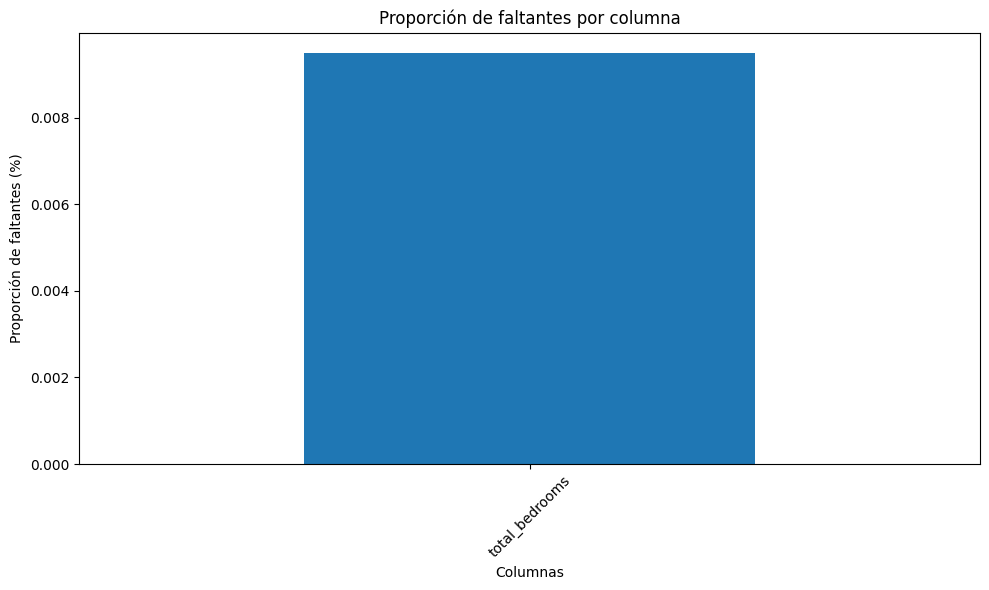

In [25]:
plt.figure(figsize=(10, 6))
prop_nan_per_col.plot(kind='bar')
plt.xlabel('Columnas')
plt.ylabel('Proporción de faltantes (%)')
plt.title('Proporción de faltantes por columna')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Imputación de datos

In [26]:
media= df['total_bedrooms'].mean()
mediana = df['total_bedrooms'].median()
print(f"Media: {media}")
print(f"Mediana: {mediana}")

Media: 537.7787561146051
Mediana: 433.0


In [29]:
df['total_bedrooms_Mean'] = np.round(df['total_bedrooms'].fillna(media), 0)
df['total_bedrooms_Median'] = np.round(df['total_bedrooms'].fillna(mediana), 0)
df['total_bedrooms_na'] = df['total_bedrooms'].dropna()

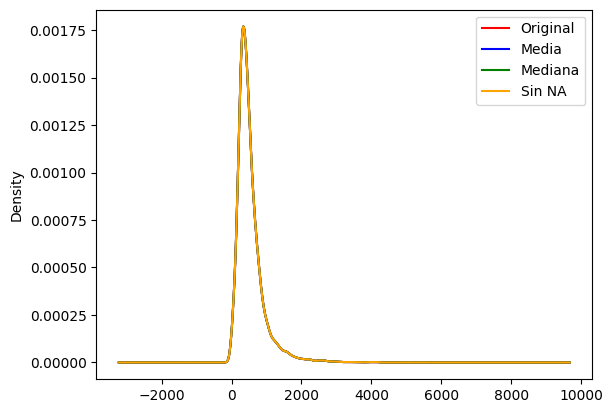

In [30]:
fig= plt.figure()
ax = fig.add_subplot(111)

df['total_bedrooms'].plot.density(color='red', label= 'Original')
df['total_bedrooms'].plot.density(color='blue', label= "Media")
df['total_bedrooms'].plot.density(color='green', label= "Mediana")
df['total_bedrooms_na'].plot.density(color='orange',label = 'Sin NA')
ax.legend()